単回帰分析

In [9]:
%matplotlib inline
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
boston = load_boston() #ボストン市の住宅価格データ一式
#予測の元になる多次元のデータ
X = pd.DataFrame(boston.data,columns=boston.feature_names)
#予測の対象になる一次元のデータ
y = pd.Series(boston.target,name='MEDV')

In [11]:
X.shape

(506, 13)

In [12]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [13]:
X = X[['RM','LSTAT']]

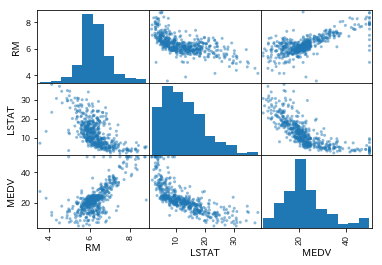

In [14]:
Xy = pd.concat([X,y.to_frame()],1)
pd.plotting.scatter_matrix(Xy);

In [15]:
Xy.corr().MEDV

RM       0.695360
LSTAT   -0.737663
MEDV     1.000000
Name: MEDV, dtype: float64

In [16]:
np.random.seed(0)
y_pred = y + np.random.randn(len(y)) * 3

In [17]:
def scatter(y_pred, y):
    plt.gca().set_aspect('equal', adjustable='box')  # 縦横比を1
    plt.ylabel('y_test(true)')
    plt.xlabel('y_pred')
    plt.plot([y.min(), y.max()], [y.min(), y.max()])  # 斜め45度の青い線
    plt.plot(y_pred, y, '.')

In [19]:
score1 = r2_score(y,y_pred)
score1

0.8945815216194627

In [20]:
score2 = mean_squared_error(y,y_pred)
score2

8.899381155543294

In [21]:
# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
# 出力時に小数点以下3桁に
%precision 3

'%.3f'

In [23]:
# 線形回帰の作成
lr = LinearRegression()
# フィッティング
lr.fit(X_train[['RM']], y_train)
# パラメータ（定数項と係数）の確認
lr.intercept_, lr.coef_

(-36.18099264633916, array([9.313]))

In [24]:
# 予測値
y_pred = lr.predict(X_test[['RM']])
# 決定係数
score1 = r2_score(y_test, y_pred)
score1

0.4679000543136781

In [25]:
# 平均二乗誤差
score2 = mean_squared_error(y_test, y_pred)
score2

43.4720416772022

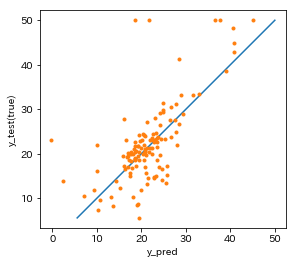

In [26]:
# 予測データ（y_pred）と真値（y_test）を描画
scatter(y_pred, y_test)

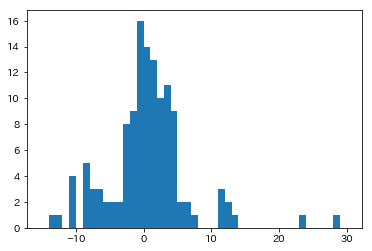

In [27]:
#残差のヒストグラム
plt.hist(y_test - y_pred,range=(-15,30),bins=45);

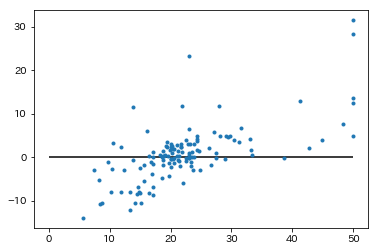

In [28]:
#目的変数との残差
plt.hlines(0,50,0)
plt.plot(y_test,y_test - y_pred,'.');

重回帰分析

In [29]:
#線形回帰の作成
lr = LinearRegression()
# フィッティング
lr.fit(X_train,y_train)
#パラメータ(定数項と係数)の確認
lr.intercept_,lr.coef_

(-0.6047107435076953, array([ 5.018, -0.675]))

In [30]:
#予測値
y_pred = lr.predict(X_test)
#決定係数
score3 = r2_score(y_test,y_pred)
score3

0.5692445415835345

In [31]:
#平均二乗法
score4 = mean_squared_error(y_test,y_pred)
score4

35.192296847182874

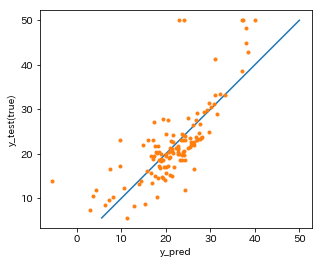

In [32]:
scatter(y_pred,y_test)

ロバスト回帰分析

In [33]:
from sklearn.linear_model import RANSACRegressor

In [34]:
#RANSACRegressorの作成
ran = RANSACRegressor(min_samples=int(len(X_train) * 0.9),random_state=0)

#フィッティング
ran.fit(X_train,y_train)
#パラメータ(定数項、係数)
ran.estimator_.intercept_,ran.estimator_.coef_

(-11.991422984375369, array([ 6.467, -0.548]))

In [35]:
#予測値
y_pred = ran.predict(X_test)
#決定係数
score = r2_score(y_test,y_pred)
score

0.5528689983272896

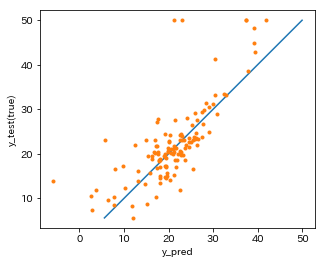

In [36]:
# 予測データ（y_pred）と真値（y_test）を描画
scatter(y_pred, y_test)